<a href="https://colab.research.google.com/github/aishadvitya/DataStructureAndAlgorithmicThinkingWithPython/blob/master/amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries 

In [ ]:
mport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from collections import Counter
from tqdm import tqdm_notebook as tqdm

import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from    keras.callbacks   import ModelCheckpoint 

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen



In [2]:

!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Books_5.json.gz

--2021-02-27 22:01:14--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Books_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7096438325 (6.6G) [application/octet-stream]
Saving to: ‘Books_5.json.gz’

Books_5.json.gz     100%[===================>]   6.61G  20.4MB/s    in 5m 35s  

2021-02-27 22:06:49 (20.2 MB/s) - ‘Books_5.json.gz’ saved [7096438325/7096438325]



In [1]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('C:\\Users\\aisha\\Downloads\\Musical_Instruments_5.json.gz')



In [3]:
df.to_csv('D:\\ML\\CA1\\data.csv')

In [6]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN


In [51]:
df=pd.read_csv('D:\\ML\\CA1\\data.csv')

userId='reviewerID'
productId='asin'
text='reviewText'
summary='summary'

In [52]:
#No of unique products 
print('Number of unique products:', len(df[productId].unique()))

print('Number of unique users:', len(df[userId].unique()))
print('Estimate of number unique reviews:', len(df[text].unique()))
len(df[summary].unique())


((df.groupby(by=[userId,productId]).count().sort_values(by=['reviewText'],ascending=False)>1)==True).sum()

df = df.sort_values(productId,axis=0,ascending=True,kind='quicksort',na_position='last')
df.head()
df=df.drop_duplicates(subset=[userId,productId], keep='first', inplace=False)
print(df.shape)

Number of unique products: 10620
Number of unique users: 27530
Estimate of number unique reviews: 188726
(219156, 13)


In [53]:
df.groupby(by=[userId,productId]).count().sort_values(by=['reviewText'],ascending=False).head()


Unnamed: 0  overall  verified  reviewTime  \
reviewerID           asin                                                    
A0072193KFP6LUHKEXLT B000068O35           1        1         1           1   
A3IDC5FP52KJWJ       B000KGYAYQ           1        1         1           1   
                     B000PO30QM           1        1         1           1   
                     B00186HCX8           1        1         1           1   
                     B00186J790           1        1         1           1   

                                 reviewerName  reviewText  summary  \
reviewerID           asin                                            
A0072193KFP6LUHKEXLT B000068O35             1           1        1   
A3IDC5FP52KJWJ       B000KGYAYQ             1           1        1   
                     B000PO30QM             1           1        1   
                     B00186HCX8             1           1        1   
                     B00186J790             1           1        1   

                                 unixReviewTime  vote  style  image  
reviewerID           asin                                            
A0072193KFP6LUHKEXLT B000068O35               1     0      1      0  
A3IDC5FP52KJWJ       B000KGYAYQ               1     0      1      0  
                     B000PO30QM               1     0      1      0  
                     B00186HCX8               1     0      1      1  
                     B00186J790               1     0      1      0

In [54]:
#Are there duplicate reviews
((df.groupby(by=[userId,productId]).count().sort_values(by=[text],ascending=False)>1)==True).sum()


Unnamed: 0        0
overall           0
verified          0
reviewTime        0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
vote              0
style             0
image             0
dtype: int64

In [55]:
df=df.drop_duplicates(subset=[userId,productId], keep='first', inplace=False)


In [56]:
print(df.isna().any())
df.dropna(axis=0,inplace=True,how='all')


Unnamed: 0        False
overall           False
verified          False
reviewTime        False
reviewerID        False
asin              False
reviewerName       True
reviewText         True
summary            True
unixReviewTime    False
vote               True
style              True
image              True
dtype: bool


In [57]:
from datetime import datetime

# converting unix time to year/month/day format, hour/min/sec is not available
df['reviewTime']=df['unixReviewTime'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m-%d'))
#strftime('%Y-%m-%d %H:%M:%S'))
df['reviewTime_hms']=df['unixReviewTime'].apply(lambda col: datetime.utcfromtimestamp(int(col)).strftime('%Y-%m'))

In [58]:
df.shape

(219156, 14)

In [59]:
def clean_span(col):  
    col=str(col)
    if('<span' not in col.lower()):

        return col.lower()

In [60]:
df['text_new']=df[text].apply(clean_span)
df.drop('style',axis=1,inplace=True)
df.drop('image',axis=1,inplace=True)
df.isnull().sum()



Unnamed: 0             0
overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          37
reviewText            47
summary               49
unixReviewTime         0
vote              186619
reviewTime_hms         0
text_new               0
dtype: int64

In [63]:
df=df.fillna({'vote':0})

In [64]:
df.isnull().sum()

Unnamed: 0         0
overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName      37
reviewText        47
summary           49
unixReviewTime     0
vote               0
reviewTime_hms     0
text_new           0
dtype: int64

In [66]:
df.dropna(inplace=True)
df.shape

(219024, 13)

In [69]:
import re

#Decontraction : expand words
def decontraction(word):
    # specific
    word = re.sub(r"won't", "will not", word)
    word = re.sub(r"can\'t", "can not", word)

    # general
    word = re.sub(r"n\'t", " not", word)
    word = re.sub(r"\'re", " are", word)
    word = re.sub(r"\'s", " is", word)
    word = re.sub(r"\'d", " would", word)
    word = re.sub(r"\'ll", " will", word)
    word = re.sub(r"\'t", " not", word)
    word = re.sub(r"\'ve", " have", word)
    word = re.sub(r"\'m", " am", word)
    return word

print(df[text].values[900])
# As we can there is "'t" in our sentence. we need to replace all these words to their original words.
print("\n",'='*50,'\n')

# For this to fully work first we need to convert the sentence to lower case.
# Anyways we can are going to use it here as this is just an example.
print(decontraction(df[text].values[900]))

great cable at a great price!


great cable at a great price!


In [75]:
#Remove stop words ..
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
# Creating sets of stop keywords

def rm_stop_words(sentence):
    sentence = ' '.join(e for e in sentence.split() if e not in stopwords)
    return sentence

print(re.sub('[^A-Za-z0-9]+',' ',df[text].values[0]))                
     
    
# def remove_stopword(col):
#         col_list=[]
#         txt_col_split=col.lower().replace('\n'," ").strip().split(" ")
        
#         for word_ in txt_col_split:
              
#             if ((word_ not in stop_word_list) and len(word)>3):
                
#                 col_list.append(word_)

#         return (col_list)

df['altered_text']=df[text].apply(rm_stop_words)



It s good for beginners


In [76]:
df['text_length']=df[text].apply(lambda col: len(col.split(' ')))


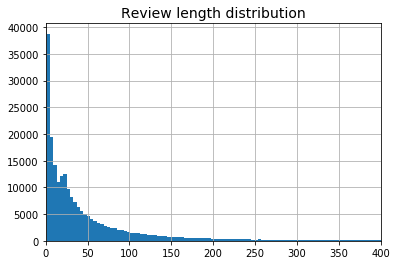

In [78]:
import matplotlib.pyplot as plt

df['text_length'].hist(bins=1000);
plt.xlim(0,400)
plt.title('Review length distribution',fontsize=14);


In [79]:
df['text_length'].describe()


count    219024.000000
mean         56.605938
std          97.689971
min           1.000000
25%           9.000000
50%          26.000000
75%          64.000000
max        4008.000000
Name: text_length, dtype: float64

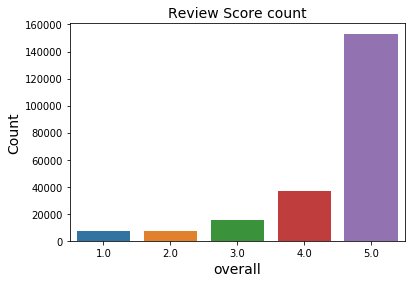

In [81]:
import seaborn as sns

# plotting count of each review star
sns.countplot(x='overall', data=df);
plt.xlabel('overall',fontsize=14);
plt.ylabel('Count',fontsize=14);
plt.title('Review Score count',fontsize=14);
plt.savefig('review_score_count.png')


In [83]:
def score_pos_neg(col):
    if col>3:
        return 1
    else:
        return 0

df['score_pos_neg']=df['overall'].apply(score_pos_neg)


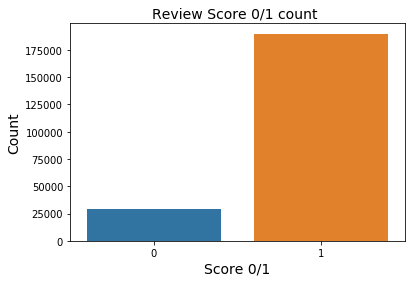

In [85]:
#plotting count of positive "1" and negative "0" reviews
sns.countplot(x='score_pos_neg', data=df);
plt.xlabel('Score 0/1',fontsize=14);
plt.ylabel('Count',fontsize=14);
plt.title('Review Score 0/1 count ',fontsize=14);
plt.savefig('review_score_01count.png')


In [86]:
df.to_csv('amazon_review_parsed.csv',index=False)


DATA PREPARATION:
1. 